<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_smiles/blob/main/LSM_revised2023_10_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSM smile/fearful 2023/10/15 newer code

CSV file should include the following columns:


*   Columns that are specified as arguments of the function cacl_slope(), such as "smile1_P7"
*   participant No.
*   EC
*   EC_group






# Compute slope (and intercept) of the function

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

model = linear_model.LinearRegression()

# df = pd.read_csv("lsm_demo.csv")

# row: participant, column: number (0, 1, 2, 3)

# Results list

x = [[0], [1], [2], [3]]


def calc_slope(csv_name, columns_of_interest):

  df = pd.read_csv(csv_name, encoding="shift-jis")
  unique_pars = df["participant No."].unique()

  #clear results
  coef_results = []
  intercept_results = []

  # List of participants
  unique_pars = df["participant No."].unique()
  pars_num = len(unique_pars)

  #y = df[df["participant"] == 1][["participant", "smile1"]].values.tolist()

  fig, ax1 = plt.subplots(1, 1)
  #fig, ax = plt.subplots(1, 1)

  df_demog = df[["participant No.", "EC"]]
  df_interest = df[columns_of_interest]
  df2 = pd.concat([df_demog, df_interest], axis = 1)

  for participant, n in zip(unique_pars, range(pars_num)):
    y = df2[df2["participant No."] == participant]
    y_list_all = y.values.flatten().tolist()
    y_list = y_list_all[2:6]

    two_d_y = [[i] for i in y_list]
    print(two_d_y)
    model.fit(x, two_d_y)

    coef = model.coef_.flatten().tolist()
    intercept = model.intercept_.tolist()

    coef_results.append(coef[0])
    intercept_results.append(intercept[0])

    ax1.scatter([0, 1, 2, 3], y_list)
    ax1.plot(x, model.predict(x))

  ### Creating result dataframe
  df_results = pd.DataFrame()
  df_results["id"] = unique_pars
  df_results["coef"] = coef_results
  df_results["intercept"] = intercept_results
  df_results["EC"] = df2["EC"]
  df_results["EC_group"] = df["EC_group"]
  return df_results

# Scatter plot (and create csv file)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def coef_scatter(title, df_results):
  fig, ax1 = plt.subplots(1,1, figsize = (3, 3))

  slope, intercept, r_value, p_value, std_err = linregress(df_results["EC"], df_results["coef"])

  ax1.scatter(df_results["EC"], df_results["coef"])
  ax1.set_xlabel("EC")
  ax1.set_ylabel("Coefficient")
  ax1.set_title(title, weight = "bold")
  ax1.spines["top"].set_visible(False)
  ax1.spines["right"].set_visible(False)

  ax1.set_xticks(np.arange(15, 40, 5))
  ax1.set_xlim(13, 35)

  trendline = slope * df_results["EC"] + intercept
  ax1.plot(df_results["EC"], trendline, color='black', label="Trendline")

  df_results.to_csv(title + ".csv")
  plt.savefig(title + ".png", dpi = 500, bbox_inches='tight')

# Fearful N170

In [ ]:
df_results = calc_slope("Fearful_data_for_python2023.csv", ["fearful0_P7", "fearful1_P7", "fearful2_P7", "fearful3_P7"])

FileNotFoundError: ignored

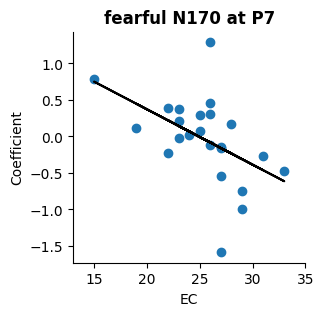

In [ ]:
coef_scatter("fearful N170 at P7", df_results)

[[-5.825], [-5.978], [-6.814], [-4.94]]
[[-1.783], [-1.443], [-1.076], [-3.12]]
[[-3.495], [-2.97], [-3.299], [-4.129]]
[[-8.285], [-8.145], [-9.41], [-6.851]]
[[-5.542], [-6.9], [-7.511], [-6.967]]
[[-10.955], [-11.661], [-13.297], [-13.113]]
[[-2.579], [-4.788], [-1.534], [-2.039]]
[[-2.852], [-1.851], [-2.666], [-3.31]]
[[-3.716], [-3.641], [-3.513], [-3.784]]
[[1.377], [1.164], [0.435], [0.578]]
[[-4.816], [-6.786], [-6.64], [-5.885]]
[[-6.092], [-9.306], [-7.734], [-8.553]]
[[-6.222], [-3.896], [-4.112], [-4.653]]
[[-5.204], [-5.137], [-3.702], [-6.562]]
[[-7.721], [-8.285], [-8.5], [-8.879]]
[[3.084], [2.421], [4.038], [3.778]]
[[-7.631], [-7.705], [-8.376], [-8.377]]
[[-9.983], [-9.829], [-9.465], [-9.582]]
[[-1.816], [-1.917], [-2.978], [-2.226]]
[[3.562], [1.355], [1.656], [-2.218]]
[[1.525], [0.854], [4.236], [6.214]]
[[-3.137], [-4.277], [-3.72], [-3.085]]
[[0.796], [-0.816], [1.364], [0.352]]


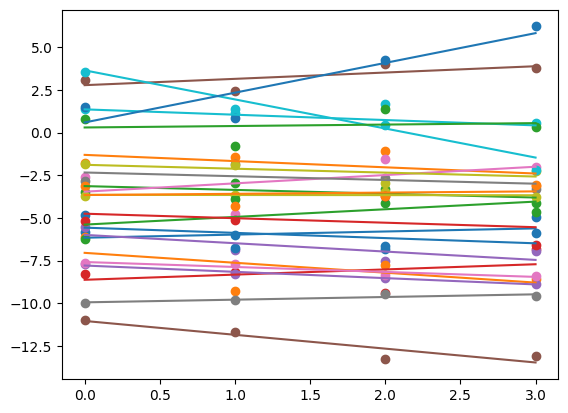

In [ ]:
df_results_P8 = calc_slope("Fearful_data_for_python2023.csv", ["fearful0_P8", "fearful1_P8", "fearful2_P8", "fearful3_P8"])

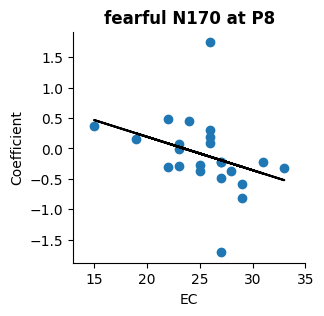

In [ ]:
coef_scatter("fearful N170 at P8", df_results_P8)

# Smile N170

[[-1.961], [-1.711], [-0.932], [-1.967]]
[[-3.125], [-3.247], [-6.51], [-4.051]]
[[-3.082], [-1.275], [-3.071], [-2.895]]
[[0.367], [-0.017], [1.613], [-0.665]]
[[0.728], [-0.615], [-0.6], [0.659]]
[[-3.236], [-5.705], [-6.023], [-4.793]]
[[-7.25], [-6.08], [-5.884], [-7.777]]
[[-0.546], [-1.133], [-2.481], [-1.291]]
[[-0.195], [-0.069], [0.085], [-1.874]]
[[-6.569], [-6.441], [-5.929], [-6.925]]
[[-3.91], [-5.546], [-4.173], [-2.205]]
[[-10.443], [-9.645], [-11.124], [-12.506]]
[[-2.832], [-4.996], [-2.839], [-4.395]]
[[-5.147], [-6.276], [-5.857], [-4.34]]
[[-12.502], [-14.378], [-13.791], [-13.145]]
[[-4.811], [-4.741], [-5.98], [-5.359]]
[[-2.871], [-3.595], [-3.21], [-2.647]]
[[4.785], [4.141], [4.275], [5.571]]
[[-3.194], [-1.509], [-3.33], [-2.908]]
[[4.907], [1.806], [3.655], [4.226]]
[[-1.205], [-1.759], [2.765], [2.611]]
[[-6.449], [-5.287], [-5.781], [-6.297]]
[[-0.365], [-0.919], [-0.448], [-2.097]]
[[-1.511], [0.625], [0.762], [1.623]]
[[-4.339], [-3.82], [-5.695], [-4.201

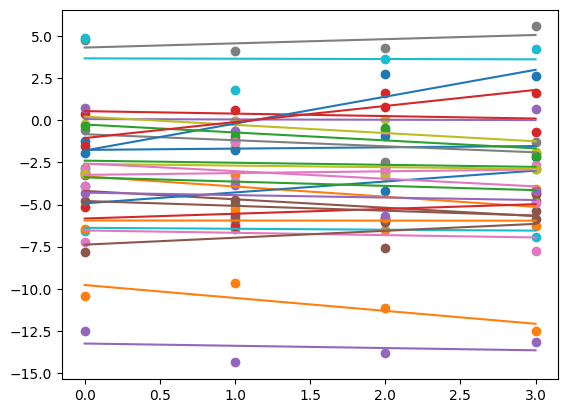

In [18]:
df_results_smile_N170_P7 = calc_slope("Smile#_120-140&180-200-.csv", ["smile0_P7", "smile1_P7", "smile2_P7", "smile3_P7"])

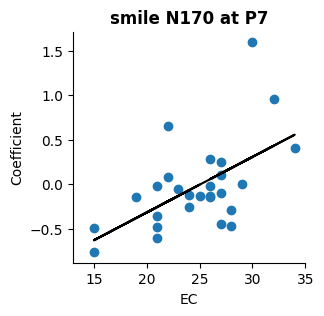

In [19]:
coef_scatter("smile N170 at P7", df_results_smile_N170_P7)

[[-2.134], [-3.167], [-2.117], [-2.891]]
[[-3.066], [-4.381], [-6.188], [-4.752]]
[[-1.648], [-0.809], [-2.392], [-2.666]]
[[0.348], [-0.972], [-1.673], [-2.619]]
[[2.137], [1.625], [1.375], [2.794]]
[[-6.366], [-8.052], [-8.197], [-8.833]]
[[-10.785], [-9.018], [-9.245], [-11.756]]
[[-4.976], [-5.342], [-6.94], [-6.338]]
[[-2.781], [-2.951], [-3.121], [-4.355]]
[[-7.346], [-7.804], [-7.254], [-8.377]]
[[-5.793], [-6.961], [-7.083], [-4.676]]
[[-11.548], [-10.023], [-11.562], [-11.67]]
[[-6.348], [-6.378], [-5.319], [-6.076]]
[[-3.649], [-2.936], [-3.224], [-2.677]]
[[-11.857], [-13.235], [-13.148], [-13.534]]
[[-1.795], [-2.298], [-2.996], [-2.072]]
[[-3.578], [-4.427], [-4.744], [-3.796]]
[[2.575], [-0.164], [0.058], [0.864]]
[[-5.495], [-3.751], [-6.624], [-5.881]]
[[3.546], [0.693], [1.227], [0.705]]
[[-3.484], [-4.491], [-1.221], [-0.813]]
[[-9.583], [-8.769], [-8.375], [-9.44]]
[[-5.557], [-5.292], [-6.124], [-5.601]]
[[-2.149], [-0.899], [-0.905], [-0.812]]
[[-3.17], [-3.336], [

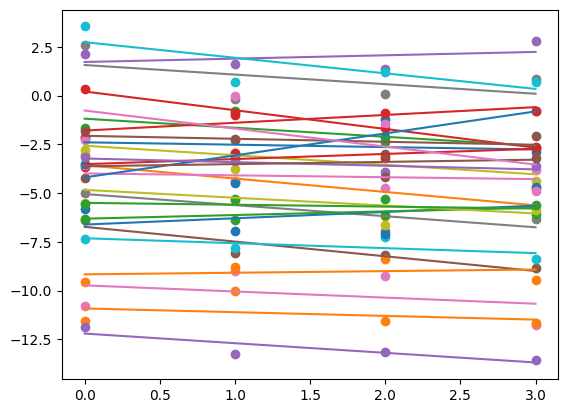

In [16]:
df_results_smile_P8 = calc_slope("Smile#_120-140&180-200-.csv", ["smile0_P8", "smile1_P8", "smile2_P8", "smile3_P8"])

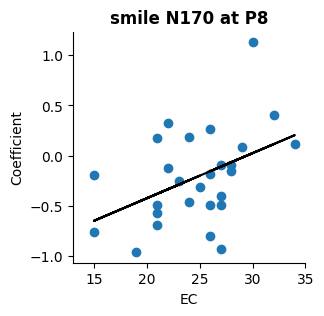

In [20]:
coef_scatter("smile N170 at P8", df_results_smile_P8)

[[5.57], [4.809], [5.255], [5.435]]
[[9.786], [7.811], [6.028], [6.62]]
[[8.443], [9.451], [9.562], [11.496]]
[[12.879], [8.404], [13.028], [11.672]]
[[5.341], [4.365], [5.07], [5.049]]
[[3.344], [3.579], [4.436], [4.352]]
[[6.661], [8.184], [7.495], [5.996]]
[[9.325], [8.433], [7.873], [8.861]]
[[2.198], [3.245], [3.011], [1.783]]
[[9.235], [7.668], [10.227], [10.117]]
[[3.079], [2.053], [4.614], [3.8]]
[[7.345], [8.565], [8.581], [6.09]]
[[7.073], [7.298], [8.249], [6.606]]
[[9.13], [10.683], [9.544], [9.857]]
[[3.082], [2.847], [2.459], [2.507]]
[[7.79], [8.433], [7.956], [8.137]]
[[4.365], [3.966], [4.8], [4.619]]
[[12.138], [10.758], [9.345], [10.957]]
[[3.28], [5.19], [2.674], [4.703]]
[[8.016], [5.983], [6.798], [7.633]]
[[1.255], [0.976], [4.474], [2.408]]
[[7.104], [6.606], [6.819], [7.076]]
[[4.76], [3.764], [5.705], [4.864]]
[[5.214], [6.706], [7.038], [7.067]]
[[10.071], [9.59], [10.055], [9.921]]
[[5.937], [6.982], [6.092], [7.901]]
[[5.756], [8.467], [7.281], [5.236]]


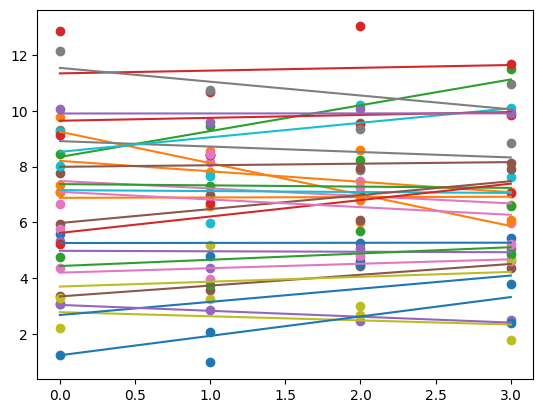

In [4]:
df_results_smile_PO8 = calc_slope("Smile#_120-140&180-200-.csv", ["smile0_PO8", "smile1_PO8", "smile2_PO8", "smile3_PO8"])

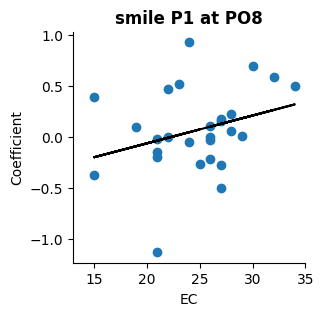

In [8]:
coef_scatter("smile P1 at PO8", df_results_smile_PO8)

[[5.725], [5.103], [6.216], [5.194]]
[[9.152], [10.596], [7.745], [8.468]]
[[3.467], [5.596], [4.102], [4.471]]
[[15.975], [11.717], [14.739], [13.508]]
[[3.116], [2.792], [2.534], [2.959]]
[[6.945], [6.743], [8.855], [6.398]]
[[7.426], [7.291], [7.242], [6.878]]
[[5.54], [3.989], [3.885], [3.897]]
[[5.842], [7.035], [5.587], [4.42]]
[[3.529], [1.857], [3.673], [3.617]]
[[3.761], [3.01], [4.749], [4.843]]
[[5.768], [6.544], [6.787], [5.795]]
[[5.586], [5.975], [6.184], [4.887]]
[[6.938], [9.336], [7.172], [8.993]]
[[-2.403], [-1.226], [-0.563], [-0.803]]
[[2.317], [3.317], [2.606], [2.879]]
[[4.875], [4.19], [5.169], [4.462]]
[[6.147], [3.844], [4.663], [6.48]]
[[2.414], [5.293], [1.379], [3.618]]
[[5.43], [4.658], [3.293], [7.274]]
[[9.234], [7.601], [13.015], [10.302]]
[[4.736], [4.443], [4.231], [5.121]]
[[4.586], [2.237], [5.307], [4.745]]
[[8.962], [10.785], [10.931], [10.757]]
[[6.156], [6.484], [6.166], [7.064]]
[[6.029], [7.582], [6.145], [7.938]]
[[3.354], [5.036], [4.946], [4

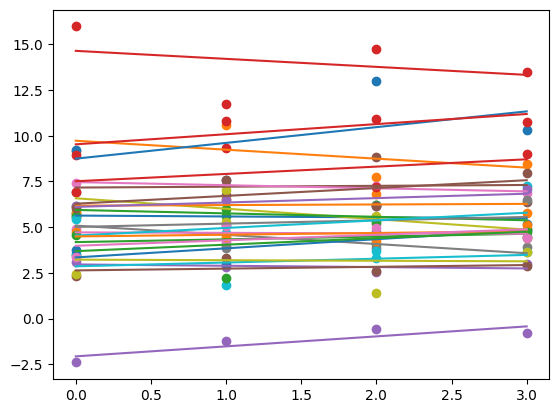

In [9]:
df_results_smile_PO7 = calc_slope("Smile#_120-140&180-200-.csv", ["smile0_PO7", "smile1_PO7", "smile2_PO7", "smile3_PO7"])

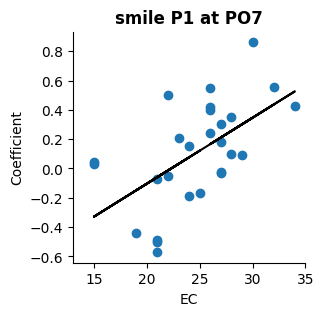

In [10]:
coef_scatter("smile P1 at PO7", df_results_smile_PO7)

[[-3.129], [-4.007], [-1.919], [-4.62]]
[[16.943], [18.985], [12.7], [15.119]]
[[2.766], [7.05], [6.495], [5.089]]
[[9.851], [10.241], [9.152], [8.365]]
[[9.58], [9.173], [8.993], [10.701]]
[[4.372], [4.491], [4.039], [4.392]]
[[-3.008], [-2.89], [-2.224], [-4.154]]
[[12.523], [12.434], [10.44], [10.731]]
[[6.439], [7.08], [6.391], [4.201]]
[[-1.064], [-1.081], [0.285], [-1.851]]
[[4.109], [2.48], [2.589], [4.506]]
[[3.2], [4.082], [2.408], [1.973]]
[[-0.439], [0.064], [0.174], [-1.767]]
[[3.081], [2.323], [1.423], [2.504]]
[[0.393], [-0.632], [0.309], [0.321]]
[[0.422], [0.213], [-0.607], [-0.855]]
[[7.263], [6.754], [7.581], [7.328]]
[[8.342], [8.411], [7.197], [8.848]]
[[3.726], [5.587], [4.231], [4.011]]
[[9.117], [6.962], [8.374], [9.525]]
[[6.656], [7.429], [11.111], [8.825]]
[[-0.564], [-0.926], [-1.272], [-1.461]]
[[10.602], [10.229], [11.329], [9.569]]
[[6.157], [7.396], [8.496], [9.603]]
[[3.562], [3.004], [3.121], [4.561]]
[[3.77], [5.168], [3.905], [4.573]]
[[5.678], [6.677

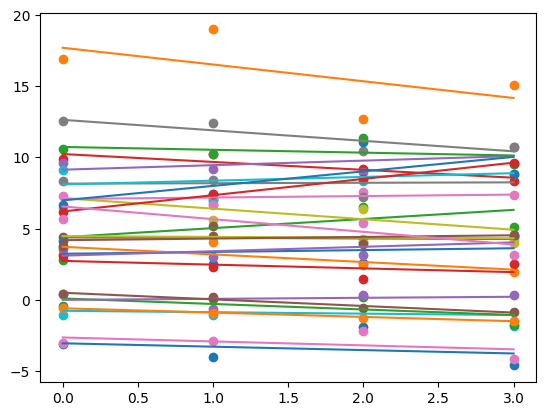

In [11]:
df_results_smile_EPN_P7 = calc_slope("Smile#_270-310&400-500_20231016.csv", ["smile0_EPN_P7", "smile1_EPN_P7", "smile2_EPN_P7", "smile3_EPN_P7"])

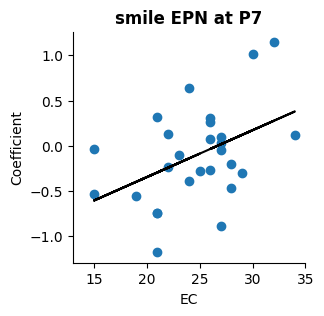

In [12]:
coef_scatter("smile EPN at P7", df_results_smile_EPN_P7)

[[0.434], [-1.28], [1.304], [-0.804]]
[[18.743], [18.702], [15.059], [17.448]]
[[5.722], [9.871], [8.679], [8.768]]
[[12.218], [11.608], [9.189], [9.882]]
[[9.52], [9.889], [9.629], [11.58]]
[[1.445], [2.672], [1.878], [0.476]]
[[-6.128], [-5.185], [-5.236], [-7.576]]
[[12.964], [14.056], [11.827], [12.445]]
[[5.306], [4.7], [4.447], [4.458]]
[[1.857], [2.687], [3.452], [2.873]]
[[3.448], [2.577], [2.043], [3.465]]
[[3.697], [5.996], [3.416], [4.439]]
[[-0.061], [2.549], [2.087], [1.959]]
[[2.992], [3.665], [2.3], [3.338]]
[[3.236], [2.672], [2.044], [3.801]]
[[2.426], [2.225], [2.078], [2.212]]
[[6.669], [5.86], [5.763], [7.352]]
[[12.66], [12.21], [11.082], [11.35]]
[[7.788], [10.481], [8.113], [7.754]]
[[13.699], [11.957], [12.449], [13.614]]
[[11.274], [11.984], [15.121], [13.015]]
[[1.347], [1.71], [1.429], [1.149]]
[[16.472], [17.695], [17.943], [17.277]]
[[6.043], [6.364], [8.055], [8.251]]
[[2.874], [1.58], [2.137], [1.861]]
[[2.707], [4.886], [3.059], [3.172]]
[[7.592], [8.564

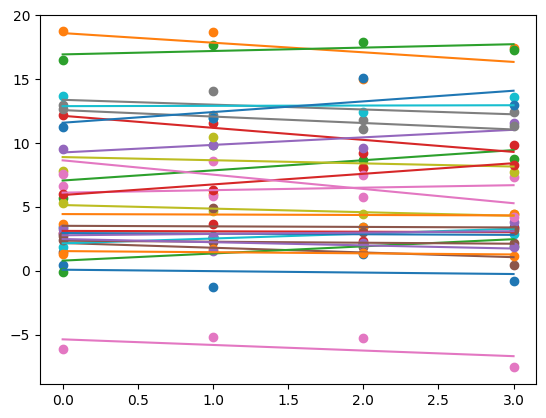

In [14]:
df_results_smile_EPN_P8 = calc_slope("Smile#_270-310&400-500_20231016.csv", ["smile0_EPN_P8", "smile1_EPN_P8", "smile2_EPN_P8", "smile3_EPN_P8"])

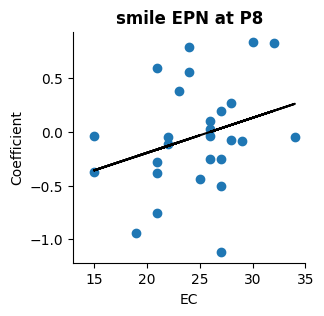

In [15]:
coef_scatter("smile EPN at P8", df_results_smile_EPN_P8)